In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ecommerce_data.csv")

In [4]:
df.head()

,OrderID,CustomerID,OrderDate,Category,SubCategory,Quantity,Price,Region,Revenue
0,1001,39,2023-05-09,Clothing,C,2,317,West,634
1,1002,29,2023-05-16,Home & Kitchen,B,2,573,East,1146
2,1003,15,2023-03-04,Electronics,C,2,531,South,1062
3,1004,43,2023-05-19,Beauty,B,1,440,West,440
4,1005,8,2023-03-22,Electronics,B,4,650,North,2600


In [5]:
df.tail()


,OrderID,CustomerID,OrderDate,Category,SubCategory,Quantity,Price,Region,Revenue
95,1096,1,2023-06-29,Home & Kitchen,B,2,1222,West,2444
96,1097,25,2023-04-23,Electronics,C,4,1671,West,6684
97,1098,7,2023-11-14,Electronics,B,1,1077,North,1077
98,1099,9,2023-02-21,Sports,A,4,1108,North,4432
99,1100,24,2023-09-25,Home & Kitchen,B,4,195,South,780


In [6]:
df.shape

(100, 9)

In [7]:
df.describe()

,OrderID,CustomerID,Quantity,Price,Revenue
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,24.400000,2.460000,1092.740000,2701.200000
std,29.011492,14.083445,1.158369,536.048479,1925.433416
min,1001.000000,1.000000,1.000000,111.000000,189.000000
25%,1025.750000,14.000000,1.000000,619.500000,1130.000000
50%,1050.500000,24.000000,2.000000,1092.500000,2342.000000
75%,1075.250000,37.250000,4.000000,1562.000000,3733.500000
max,1100.000000,49.000000,4.000000,1992.000000,7968.000000


In [8]:
df.columns


Index(['OrderID', 'CustomerID', 'OrderDate', 'Category', 'SubCategory',
       'Quantity', 'Price', 'Region', 'Revenue'],
      dtype='object')

In [10]:
df.nunique()

OrderID        100
CustomerID      45
OrderDate       83
Category         5
SubCategory      3
Quantity         4
Price          100
Region           4
Revenue         99
dtype: int64

In [11]:
df.isnull().sum()

OrderID        0
CustomerID     0
OrderDate      0
Category       0
SubCategory    0
Quantity       0
Price          0
Region         0
Revenue        0
dtype: int64

In [12]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [22]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)


In [24]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
df.drop_duplicates(inplace=True)

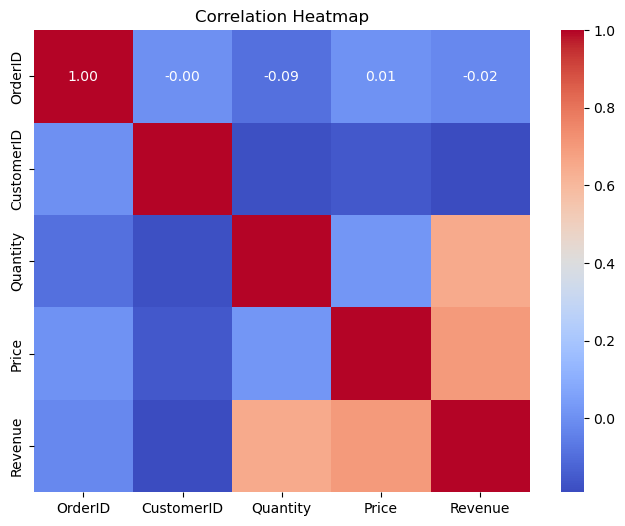

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

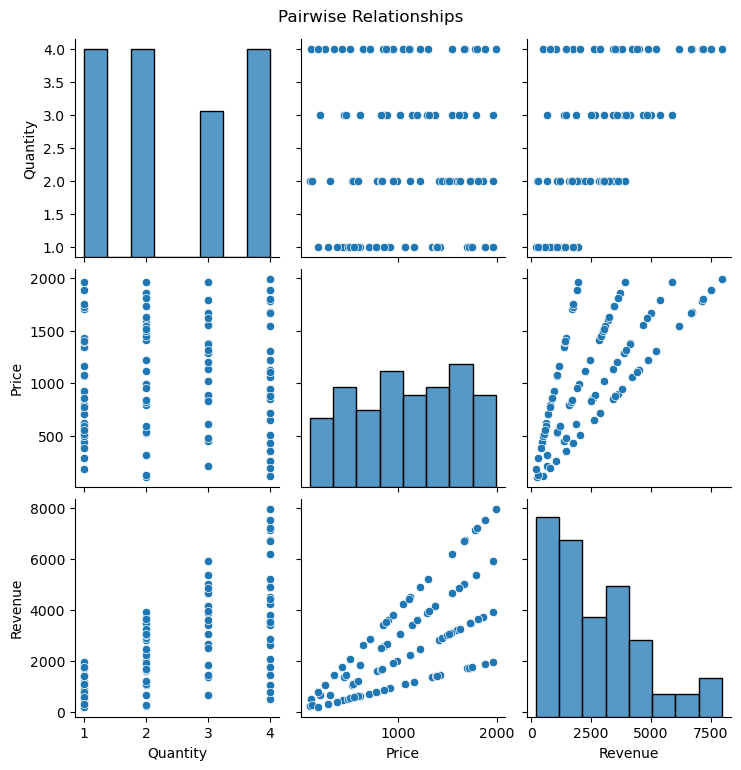

In [27]:
sns.pairplot(df[['Quantity', 'Price', 'Revenue']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


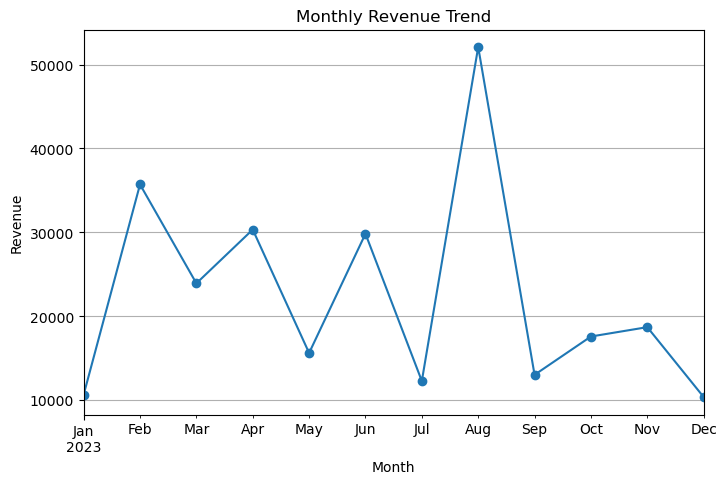

In [28]:
monthly_sales = df.groupby(df['OrderDate'].dt.to_period("M")).Revenue.sum()
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='line', marker='o', title="Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.show()

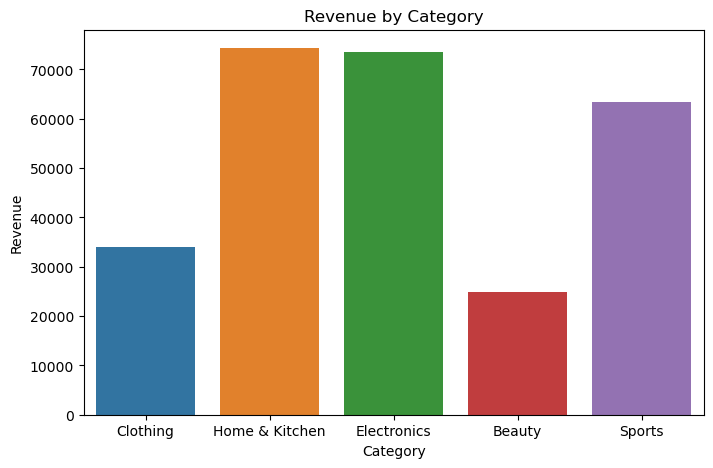

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Category'], y=df['Revenue'], estimator=sum, ci=None)
plt.title("Revenue by Category")
plt.show()

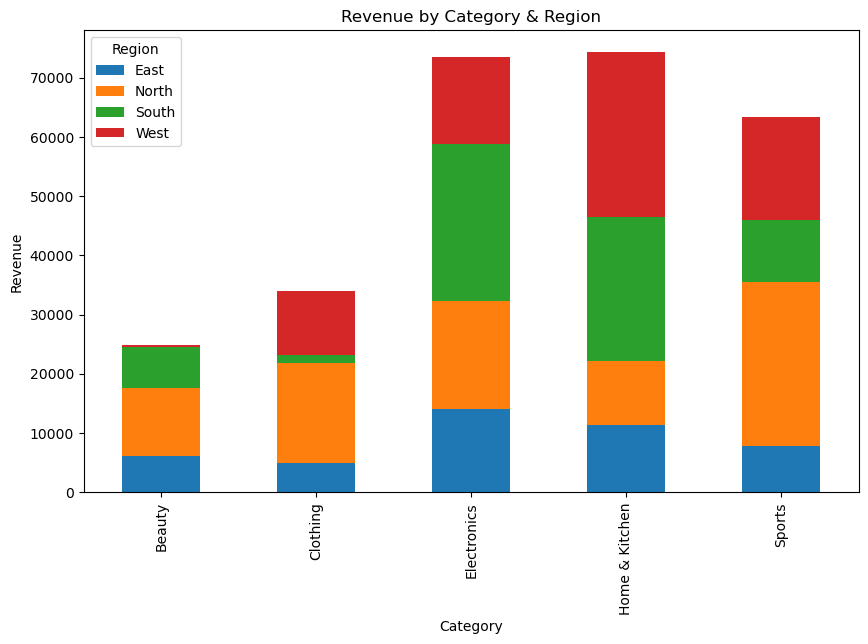

In [30]:
category_region = df.groupby(['Category', 'Region']).Revenue.sum().unstack()
category_region.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Revenue by Category & Region")
plt.ylabel("Revenue")
plt.show()


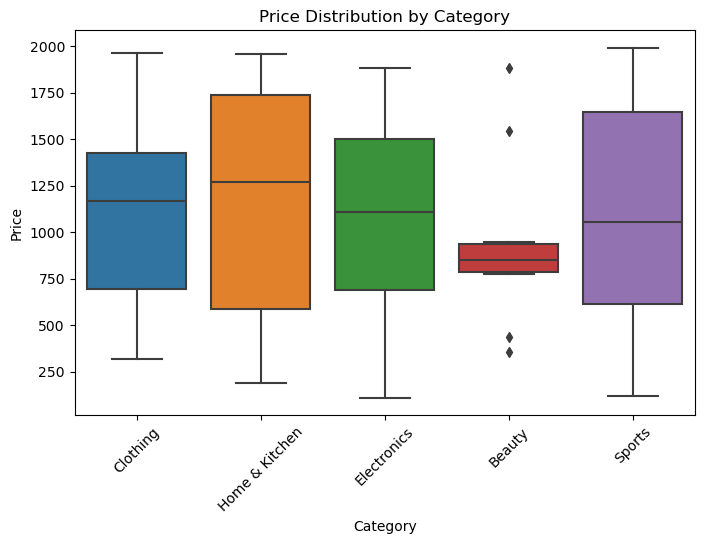

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Price', data=df)
plt.title("Price Distribution by Category")
plt.xticks(rotation=45)
plt.show()
